In [1]:
# Advanced Plotting in Python with Seaborn
# c. 2017 David V Schwab LLC

# This script demonstrates some of the advanced plotting functionality from the Seaborn package,
# using a data set with information on which passengers survived the Titanic shipwreck.

In [2]:
# Preliminaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, integrate
import seaborn as sns
%matplotlib inline

In [3]:
# Load the survival data from the Titanic data set

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Filter null values out of the 'age' variable

titanic_filtered = titanic[titanic['age'].isnull() == 0]

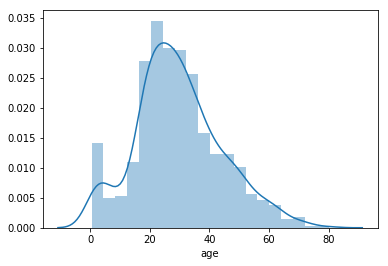

In [5]:
# Plot a distribution plot
# This is a histogram overlaid with a kernel density estimate (KDE)
# There are various options for tuning the KDE; see the seaborn documentation for more details

sns.distplot(titanic_filtered['age'])

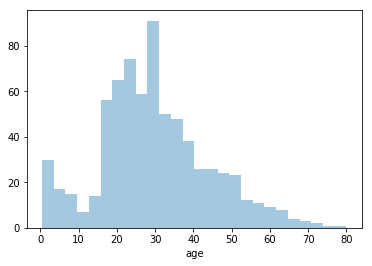

In [6]:
# Plot a simple histogram with bin cutoffs using the sqrt rule
# This rule sets the number of bins equal to sqrt(n), where n is the number of data points
# Along with Sturgis' rule, it's a good first choice if the data set isn't too small (or too non-normal)

k_sqrt = int(np.sqrt(titanic_filtered['age'].count()))
sns.distplot(titanic_filtered['age'],kde=False, bins=k_sqrt)

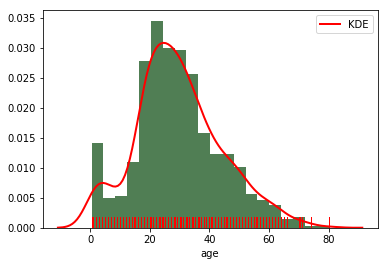

In [7]:
# Plot a kde, histogram, and rug plot
# The rug plot shows the data points as "ticks" along the horizontal axis (like the tassles on a rug)
# It helps visualize the distribution when using a KDE, since the latter plot can vary quite a bit,
# depending on the bandwidth and kernel choice


sns.distplot(titanic_filtered['age'], rug=True, rug_kws={"color": "r"},
             hist_kws={"color": "xkcd:forest green", "alpha": 0.7},
             kde_kws={"color": "r", "lw": 2, "label": "KDE"})

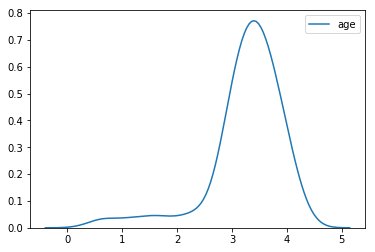

In [8]:
# Plot the log of age using a narrower bandwidth
# Plot the age using a narrower bandwidth
# This shows much greater variation
# There is no optimal choice of bandwidth: as with histograms, there are different rules that are commonly used, along with trial-and-error

sns.kdeplot(np.log(titanic_filtered['age'] + 1), bw=.25)

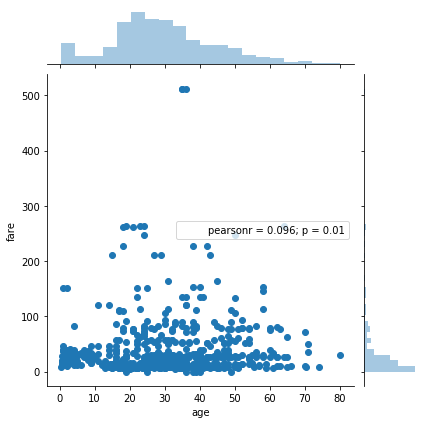

In [9]:
# Plot age vs. fare paid with a simple scatterplot

sns.jointplot(x='age',y='fare',data=titanic_filtered)

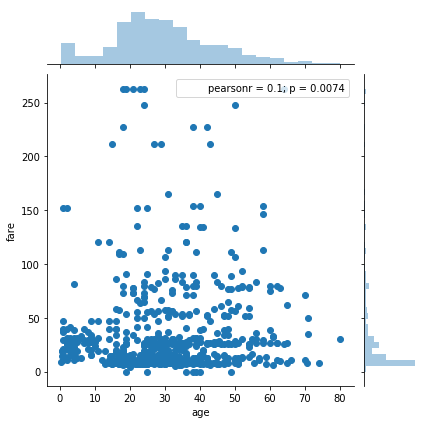

In [10]:
# Trim fares over 300, then plot again
# Note how it's difficult to visualize how the relative density of age varies with the fare,
# because each set of non-unique values maps to just one plot marker.

tff = titanic[titanic['fare'] < 300]
sns.jointplot(x='age',y='fare',data=tff)

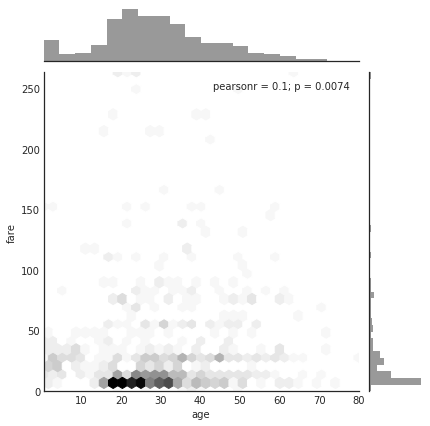

In [11]:
# Plot as a hexbin plot
# Each hex is shaded according to the relative density the points it contains, with darker shades indicating greater density
# This makes it easier to see where the relative density of the distribution lies:
# note how almost all the data points are for fares of 50 or less

with sns.axes_style('white'):
    sns.jointplot(x='age',y='fare',data=tff,kind='hex',color='k')

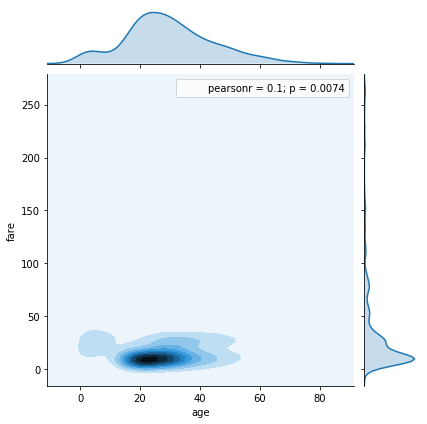

In [12]:
# Plotting the joint KDE really drives home how much of the distribution is concentrated in lower fares.
# This is like a hexplot, except the relative density is determined by localized KDE estimates, rather than the raw data

sns.jointplot(x='age',y='fare',data=tff,kind='kde')

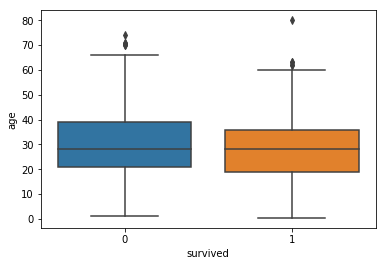

In [13]:
# Plot age by survival

sns.boxplot(x='survived',y='age',data=titanic)

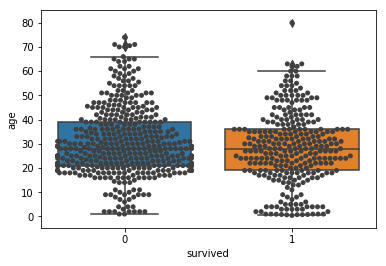

In [14]:
# Show the actual data points as well, using swarmplot
# Good evidence that age didn't predict survival
# (note: setting each plot equal to "ax" combines them in one output)

ax = sns.boxplot(x='survived',y='age',data=titanic)
ax = sns.swarmplot(x='survived',y='age',data=titanic,color='.25')

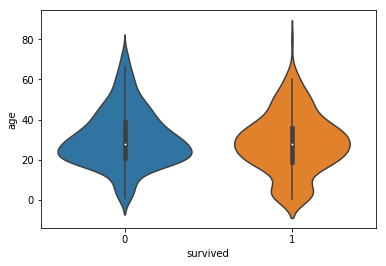

In [15]:
# A violinplot provides another view, by showing the distribution of the data instead of just the box and whiskers
# (Can you see how this plot got its name?)

ax = sns.violinplot(x='survived',y='age',data=titanic)

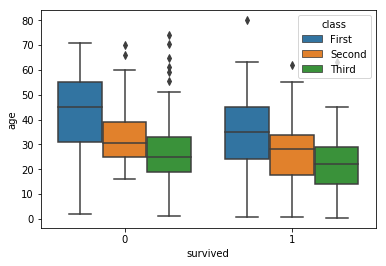

In [16]:
# Add the passenger's class: as with airlines, First Class has the most amenities (and is the most expensive!)

ax = sns.boxplot(x='survived',y='age',hue='class',data=titanic)

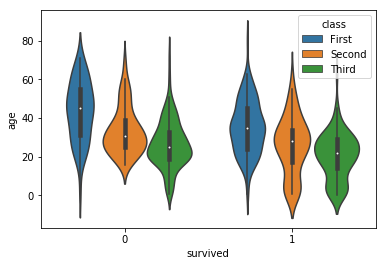

In [17]:
# Violinplot with class
# This shows some differences in the marginal distributions of certain variables

ax = sns.violinplot(x='survived',y='age',hue='class',data=titanic)

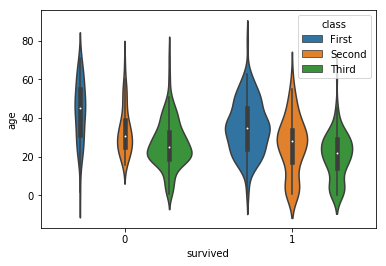

In [18]:
# Scale the violin width by the number of observations in each bin, so as not to overemphasize small samples

ax = sns.violinplot(x='survived',y='age',hue='class',scale='count',data=titanic)

In [19]:
# It sure looks like whether a passenger survived is independent of his or her age
# We can use a t-test to check this
# First, describe the data
# There are certainly enough data points, and no obvious errors or outliers

titanic_filtered.describe()['age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [20]:
# Next, group by survival status
# The means are slightly different, and the std. dev. are almost identical, which indicates a t-test may be appropriate

titanic_filtered.groupby('survived').describe()['age']

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


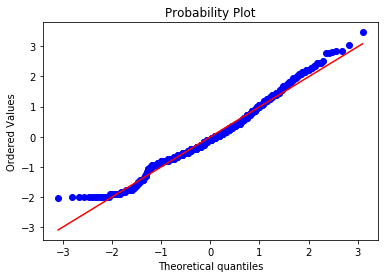

In [25]:
# Check if age is normally-distributed
# It is probably close enough, given the sample size, and the type of data (i.e. social science)

z = (titanic_filtered['age'] - titanic_filtered['age'].mean()) / titanic_filtered['age'].std()

stats.probplot(z,dist="norm",plot=plt)
plt.show()

In [26]:
# Run the test
# We're assuming age is normally distributed, and that the subsamples differ only by the sample mean
# The test statistic is 2.06, while the p-value is 0.039
# The null hypothesis is that the difference of means is zero

# Given the traditional p-value cutoff of p < 0.05, we can reject the null hypothesis, although just barely
# The sample size is moderately large, but not extreme, so it is reasonable to conclude the difference of means is not
# due to random variation.The 

# However, the observed difference (survived: 30.6, did not survive: 28.3) = 2.3 is relatively small.
# Whether this result has practical significance would depend on the research question, relative consequences of a
# Type I vs. Type II error, and (of course) the data scientist's judgment.

x = titanic_filtered[titanic_filtered['survived']==0]['age']
y = titanic_filtered[titanic_filtered['survived']==1]['age']
stats.ttest_ind(x,y)

Ttest_indResult(statistic=2.0666869462538102, pvalue=0.039124654013482488)